# Traveling salesman with GA 

### Module Import

In [1]:
import numpy as np
import matplotlib as plt
 #notebook or inline 
%matplotlib inline
plt.rcParams["figure.figsize"]=(16,8)
from math import sqrt
from random import randint

#For some cool widgets
from ipywidgets import FloatProgress
from IPython.display import display


### Read the cities file

200 cities read


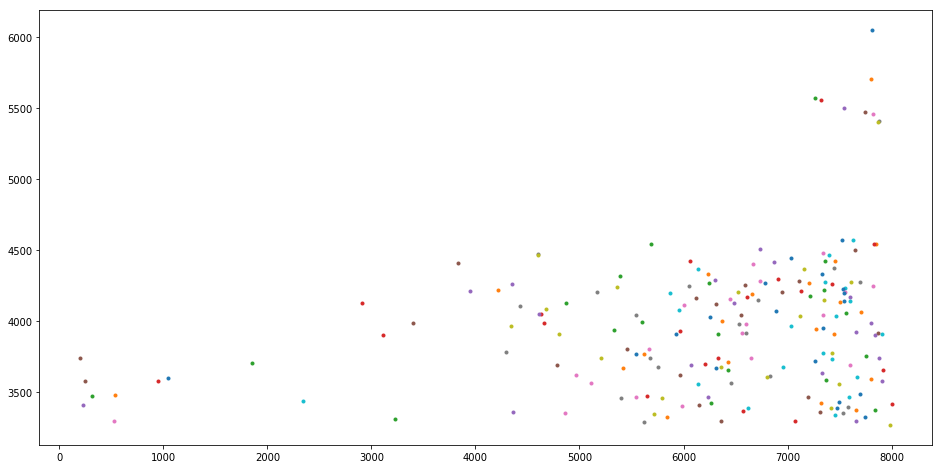

In [6]:
city_list=np.loadtxt('200.txt').astype(int)
print(str(len(city_list)) + " cities read")
#show the map
for city in city_list:
    plt.pyplot.plot(city[1],city[2],'.')
plt.pyplot.show()

### Set the initial parameters

In [7]:
nindividuals=1000
ncities=len(city_list)
cx_probability=0.9
mx_probability=0.1
max_iterations=750

## Define general funtions

### Euclidean Distance

In [8]:
def euclidian_distance(x1,y1,x2,y2):
    dist= sqrt((x1-x2)**2+(y1-y2)**2)
    return dist

In [9]:
euclidian_distance(0,0,1,1)

1.4142135623730951

### Calculate fitness

In [10]:
def calculate_fitness(individual):
    fitness=0
    #First element
    fitness=euclidian_distance(city_list[individual[0]][1],city_list[individual[0]][2],
                               city_list[individual[1]][1],city_list[individual[0]][2])
    for i in range(1,len(individual)-1):
        fitness=fitness+euclidian_distance(city_list[individual[i]][1],city_list[individual[i]][2],
                                           city_list[individual[i+1]][1],city_list[individual[i+1]][2])
    return fitness

### Mutation

In [11]:
def mutate(individual):
    #reverse mutation
    init_pos=np.random.randint(0,len(individual))
    end_pos=np.random.randint(init_pos,len(individual)+1)
    mutated_individual= np.concatenate((individual[:init_pos],
                                        individual[init_pos:end_pos][::-1],
                                        individual[end_pos:]),axis=0)
    return mutated_individual

### Crossover

   static int[][] cyclecrossover(int splitpoint, int[] p1, int[] p2){
       int[][] result = new int[2][nhouses];
       for(int i=0;i<nhouses;i++){
           result [0][i]=-1;
           result [1][i]=-1;
       }

       int currpos=splitpoint;
       int newpos=0;
       int firstval=p1[splitpoint];
       boolean cycleover=false;
       do{
           
           result [0][currpos]=p2[currpos];
           result [1][currpos]=p1[currpos];
           //usar o 2º valor 
           newpos=sequentialSearch(p1, p2[currpos]);
           if (firstval==p2[currpos]){
                cycleover=true;
           }
           currpos=newpos;

       }while (cycleover==false);
       
       //preencher os imutados
       for(int i=0;i<nhouses;i++){
           if (result [0][i]==-1){
            result [0][i]=p1[i];
            result [1][i]=p2[i];
           }
       }       
       
       return result;
   }  

In [12]:
def crossover(individual1,individual2):
    splitpoint=3
    result1=individual1
    result2=individual2
    currpos=splitpoint
    firstval=individual1[splitpoint];
    newpos=0
    
    cycleover=False
    
    while True:
        print()
        if firstval==individual2[currpos]:
            cycleover=True
            
            
        result1[0]=''
        
        if cycleover:
            break
    
    print (result1)
    print (result2)
   
    return newindividual

In [13]:
crossover(population[3],population[21])
i=np.where(population[0]==97)
population[0].shape


NameError: name 'population' is not defined

### Tournament Selection

In [14]:
def tournament_selection(pop, tournament_size):
    
    champion=population[np.random.randint(len(pop))]
    champion_fitness=calculate_fitness(champion)
    
    for i in range(0,tournament_size):
        tmpind=population[np.random.randint(len(pop))]
        tmpind_fitness=calculate_fitness(tmpind)
        if tmpind_fitness<champion_fitness:
            champion=tmpind[:]
            champion_fitness=tmpind_fitness
    return champion

### Initialization

In [15]:
population=np.zeros((nindividuals,ncities),dtype=int)
for individual in range(0,nindividuals):
    population[individual]=np.arange(ncities)
    np.random.shuffle(population[individual])

In [16]:
def draw_scatter_plot():
    ##prepare scatter
    xx=list()
    xx[:]=()
    yy=list()
    yy[:]=()

    best_individual=0
    best_individual_fitness= calculate_fitness(population[0])

    for i in range(0,nindividuals):
        if calculate_fitness(population[i])<best_individual_fitness:
            best_individual=i
            best_individual_fitness=calculate_fitness(population[i])


    for i in population[best_individual]:
        xx.append(city_list[i][1])
        yy.append(city_list[i][2])

    print("Best individual is number " + str(best_individual) + " with a fitness of " + str(best_individual_fitness))

    plt.pyplot.scatter(xx,yy,c='r',marker='o')
    plt.pyplot.plot(xx,yy)
    plt.pyplot.show()

Best individual is number 370 with a fitness of 323796.7828935526


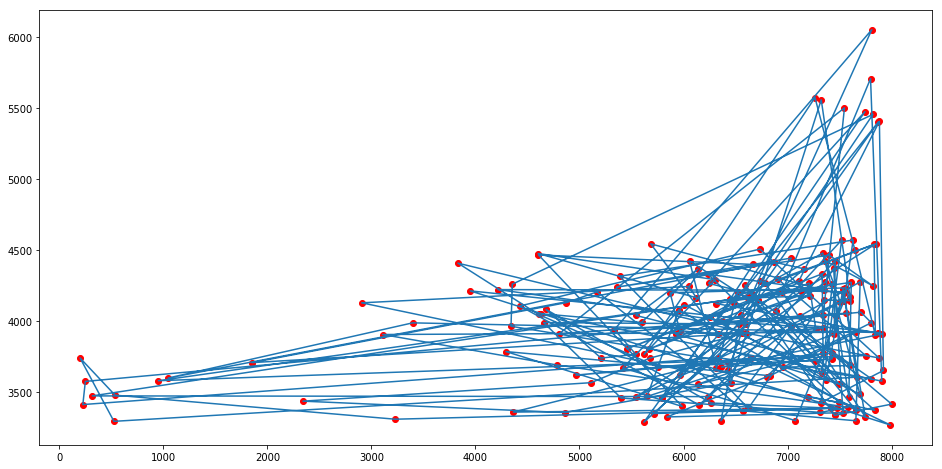

In [17]:
draw_scatter_plot()

In [18]:
x=[3,4,5,6]
sum(x)

18

A Jupyter Widget

Best individual is number 389 with a fitness of 92584.73824487296


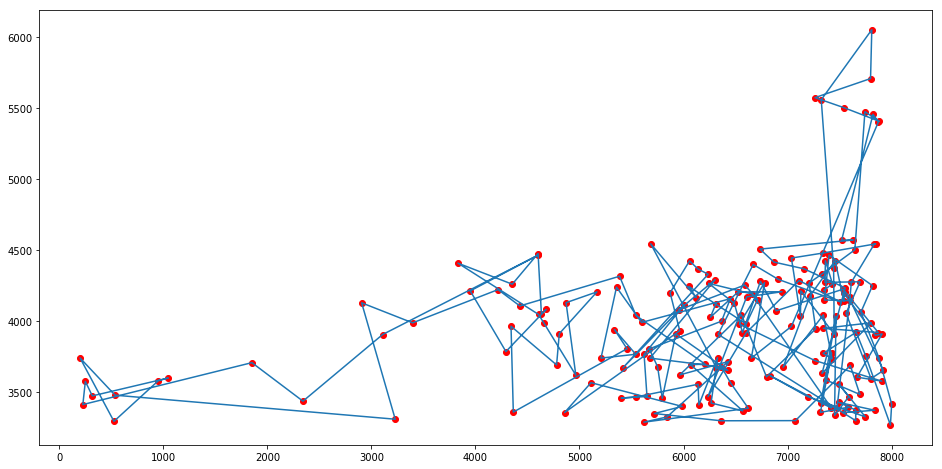

Best individual is number 207 with a fitness of 89660.1433946475


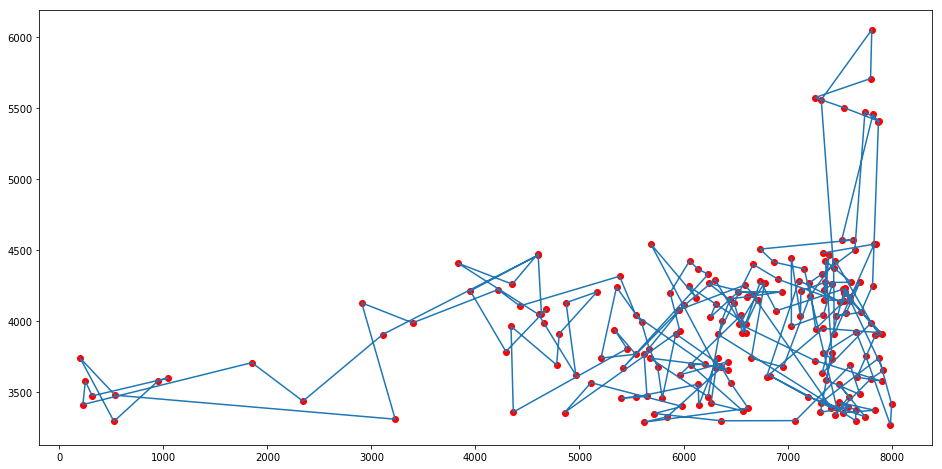

Best individual is number 442 with a fitness of 86853.9887108913


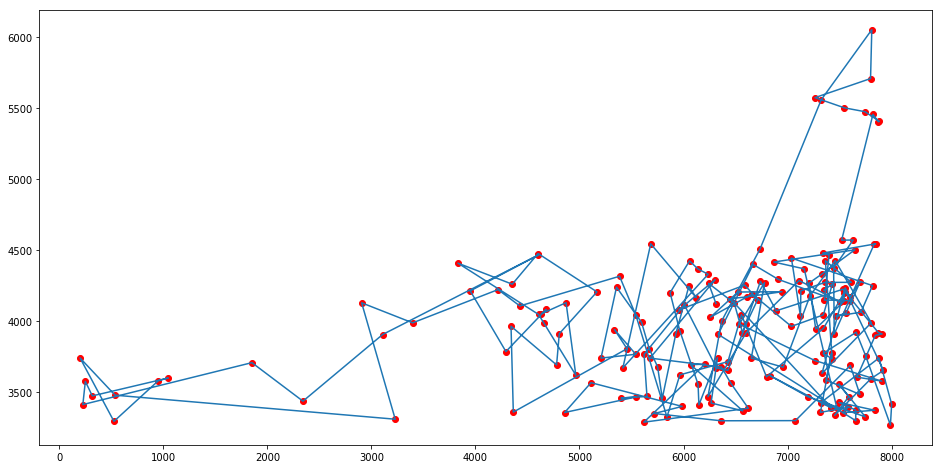

Best individual is number 732 with a fitness of 83143.19041165248


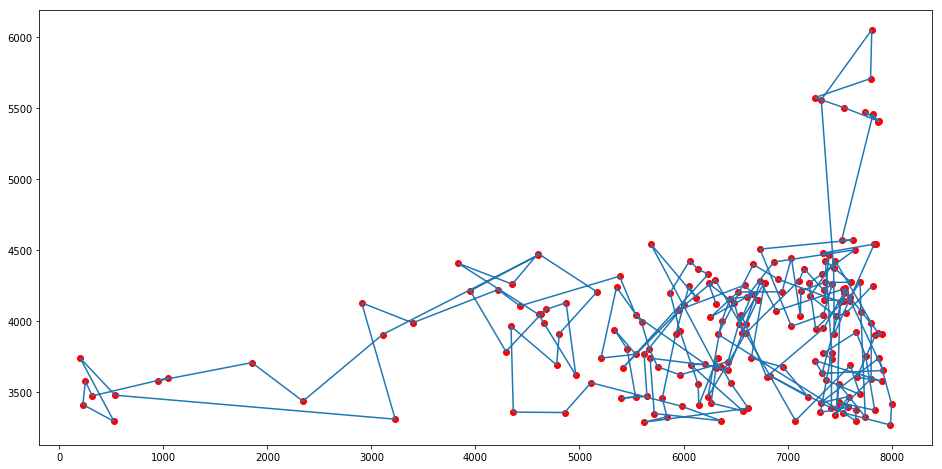

Best individual is number 671 with a fitness of 81324.73919140482


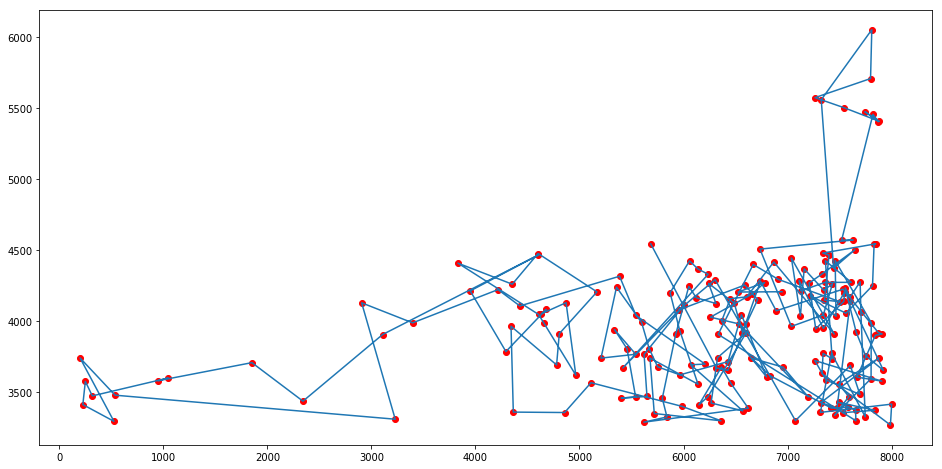

Best individual is number 654 with a fitness of 79159.42358429241


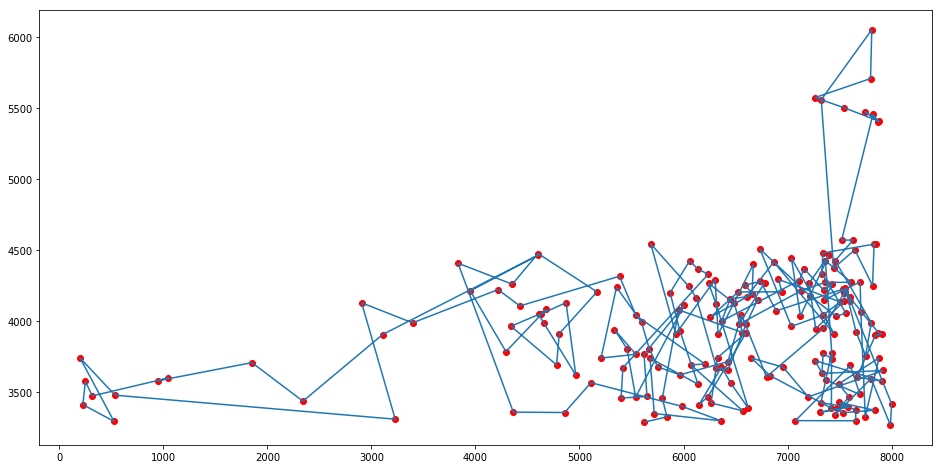

Best individual is number 745 with a fitness of 77952.69419772297


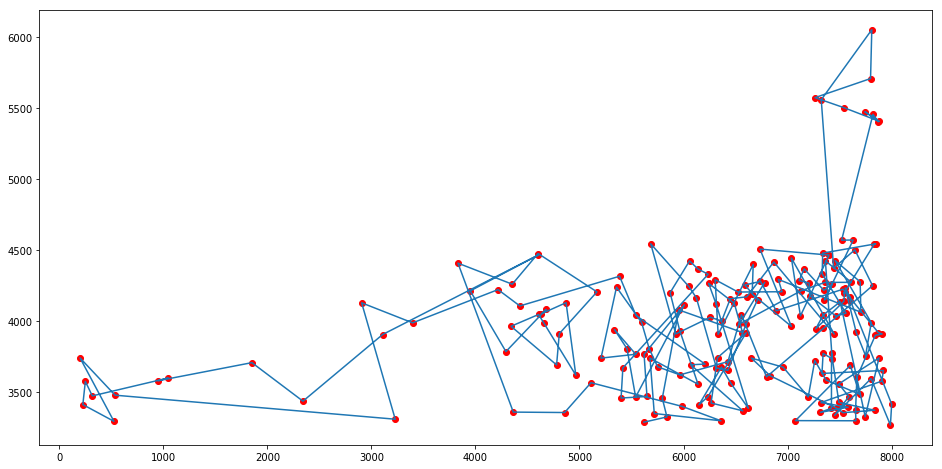

Best individual is number 445 with a fitness of 76786.5862899153


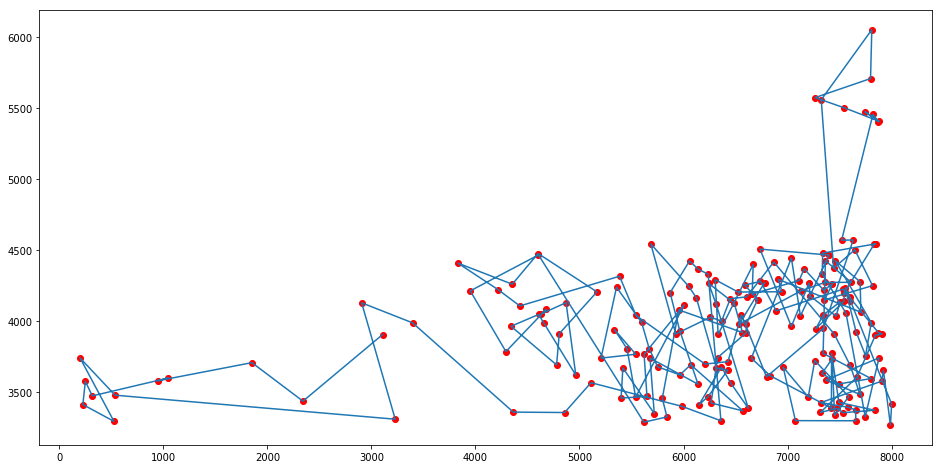

Best individual is number 555 with a fitness of 75338.1282407031


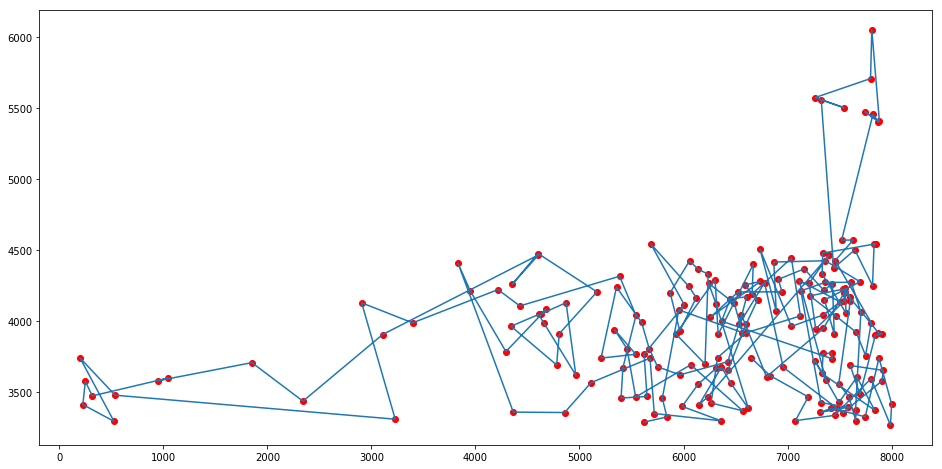

Best individual is number 661 with a fitness of 74111.84053180926


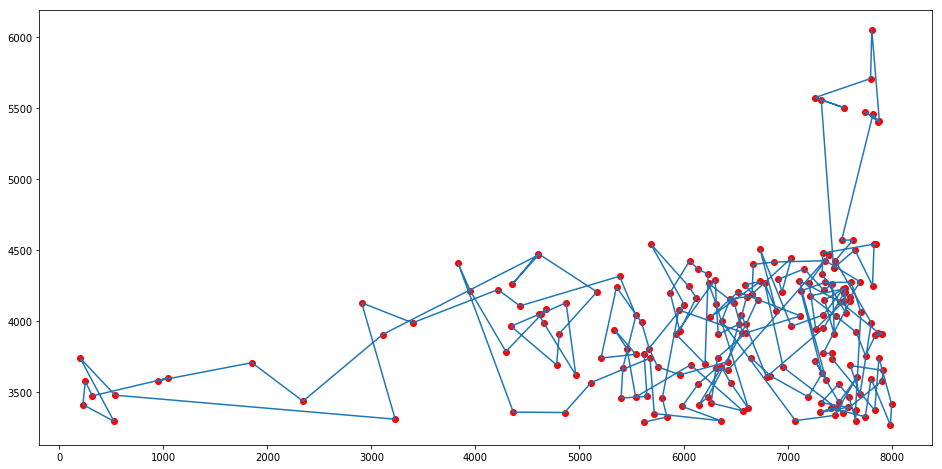

Best individual is number 464 with a fitness of 72974.59170488457


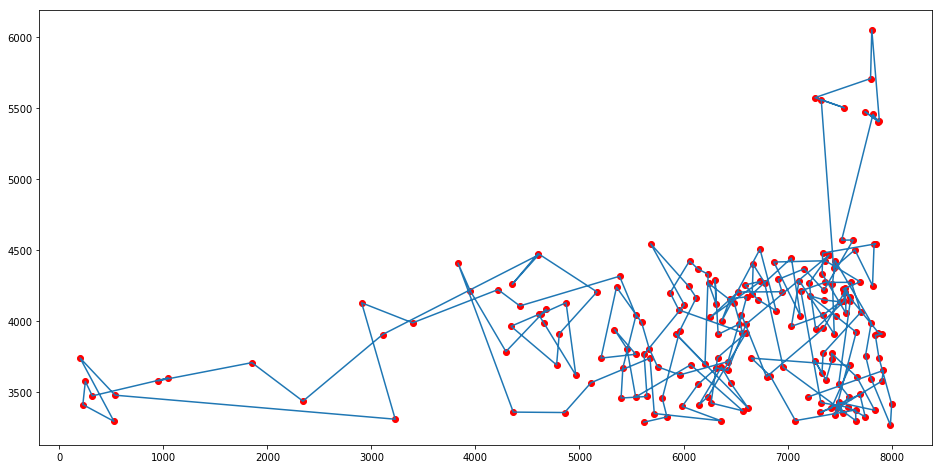

Best individual is number 519 with a fitness of 72375.63102784722


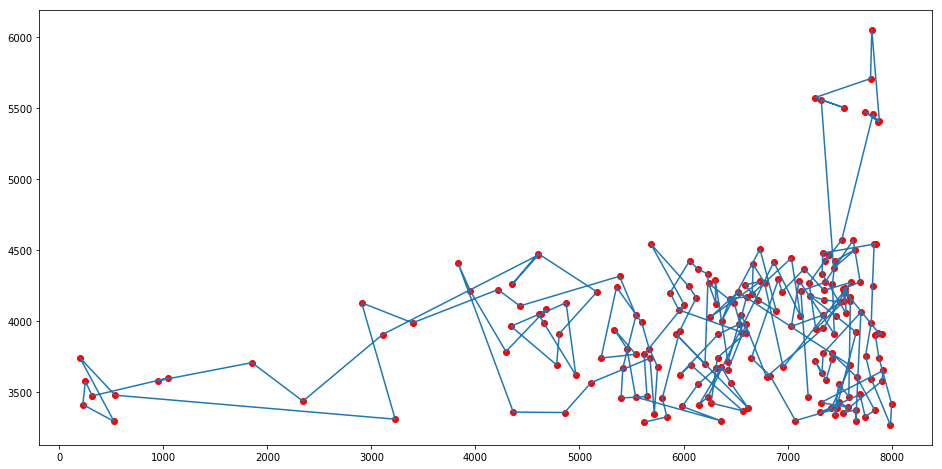

Best individual is number 724 with a fitness of 71093.40694462768


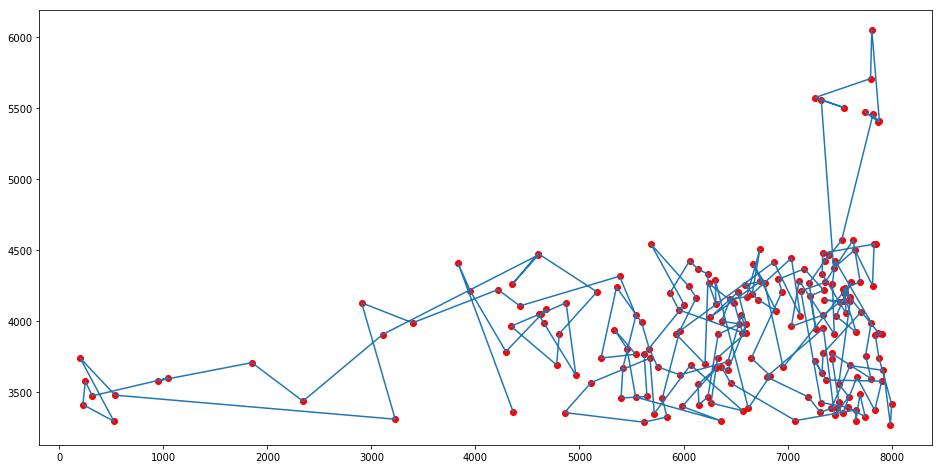

Best individual is number 168 with a fitness of 70366.79021372361


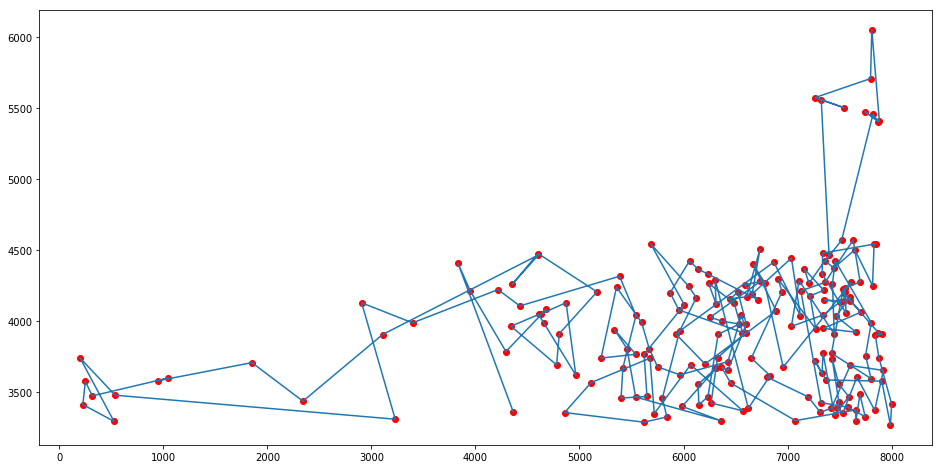

Best individual is number 641 with a fitness of 68548.74556146417


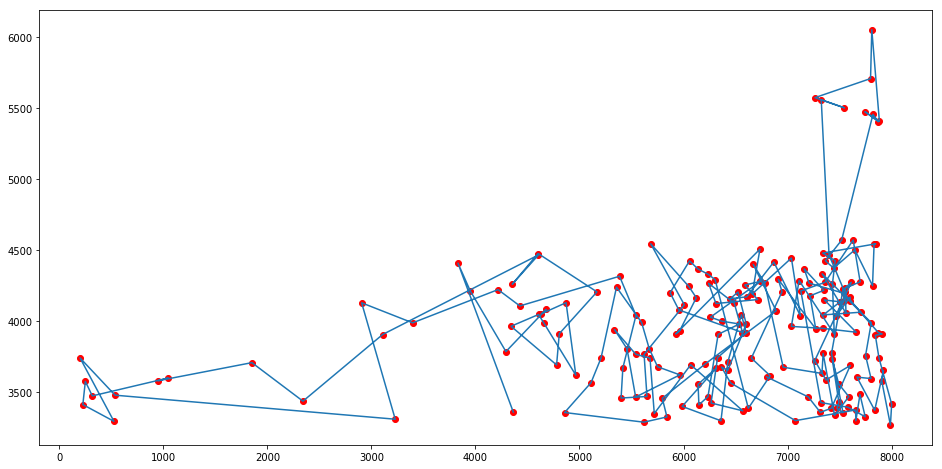

Best individual is number 297 with a fitness of 67582.06142045904


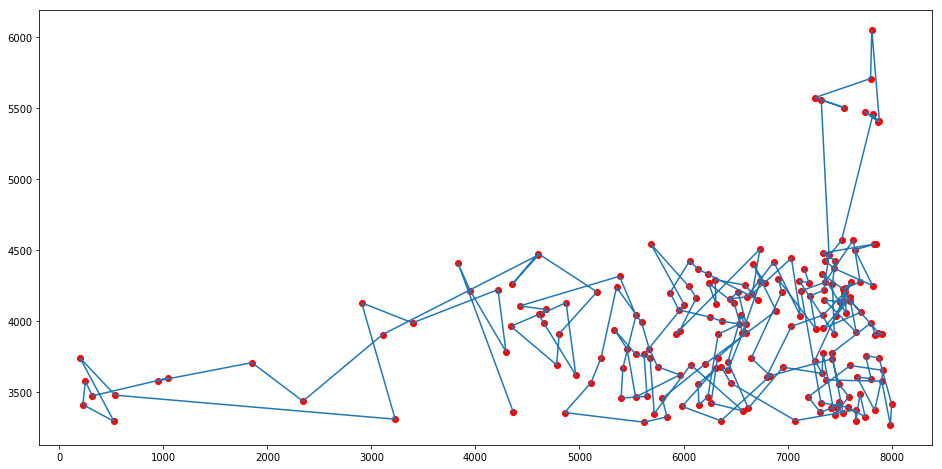

Best individual is number 912 with a fitness of 67578.49103661228


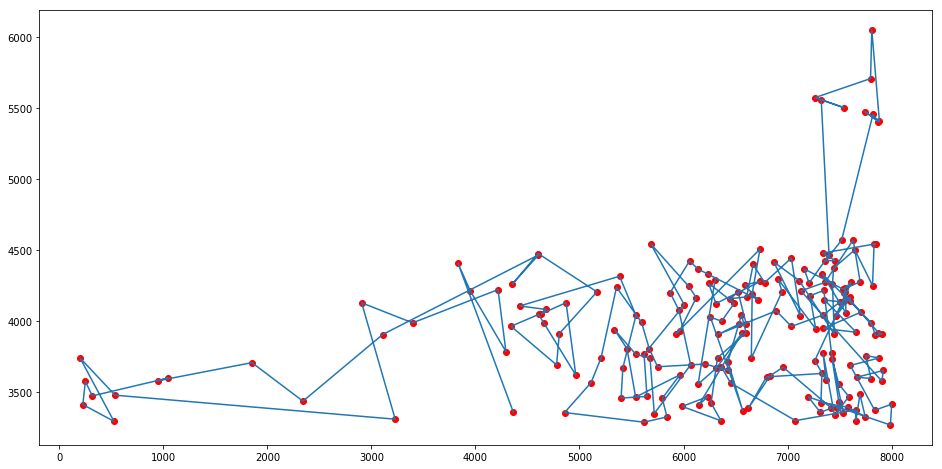

In [20]:
bxplot=list()
bxplot[:]=[]

max_iterations=max_iterations

f = FloatProgress(min=0, max=max_iterations) # instantiate the bar
display(f) # display the bar
f.value=0

for j in range(0,max_iterations):
    #initialize empty population
    tmp_population=np.zeros((nindividuals,ncities),dtype=int)
    
    bxpltseries=list()
    bxpltseries[:]=[]
    
    for i in range(0,nindividuals):
        tmp=tournament_selection(population,5)
        tmp_fitness = calculate_fitness(tmp)
        #print(tmp_fitness)
        bxpltseries.append(tmp_fitness)
        #print(tmp)
        #print(tmp.shape)
        tmp2=mutate(tmp)
        tmp_population[i]=tmp2[:]
     
    
    if j%15==0:
        bxplot.append(bxpltseries)
        draw_scatter_plot()
    
    population=tmp_population[:]
    f.value += 1
    
f.close() #hide progressbar

### Visualize the resulting fitnesses

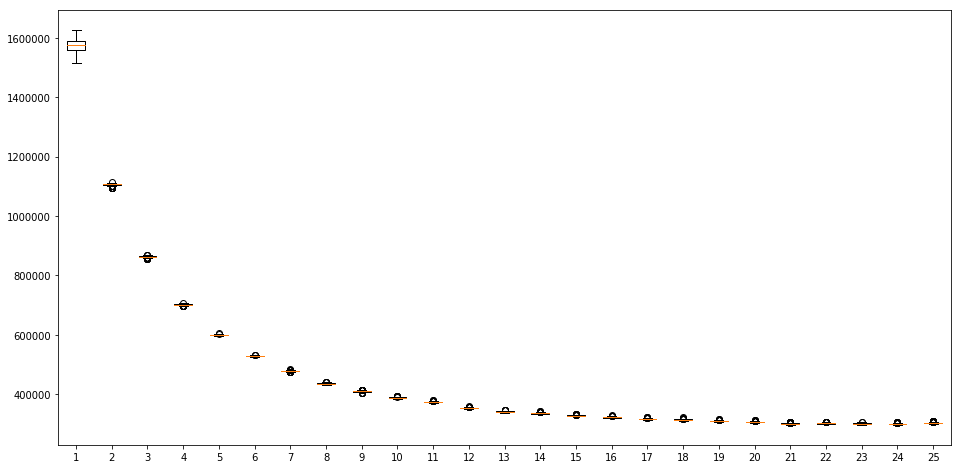

In [38]:
plt.pyplot.boxplot(bxplot)

plt.pyplot.show()